In [13]:
import requests
import hashlib
import json
import base64

import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from test_single_img import load_model_and_label, pred_single, label_dict

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 微软雅黑
mpl.rcParams['font.serif'] = ['Microsoft YaHei']
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题,或者转换负号为字符串

In [30]:
def gen_imgs(img):
    interval = 6
    length = 66
    for x in range(41, img.shape[0] - length, interval + length):
        for y in range(interval, img.shape[1] - length, interval + length):
            yield img[x:x + length, y:y + length]

load_model_and_label()

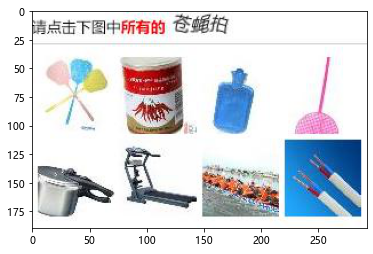

In [78]:
# def get_img():
url = 'https://kyfw.12306.cn/passport/captcha/captcha-image64'
r = requests.get(url)
img_str = json.loads(r.content)['image']

decoded = base64.b64decode(img_str)

img = np.asarray(bytearray(decoded), dtype="uint8")
img = cv2.imdecode(img, cv2.IMREAD_COLOR)
plt.imshow(img[:, :, ::-1])

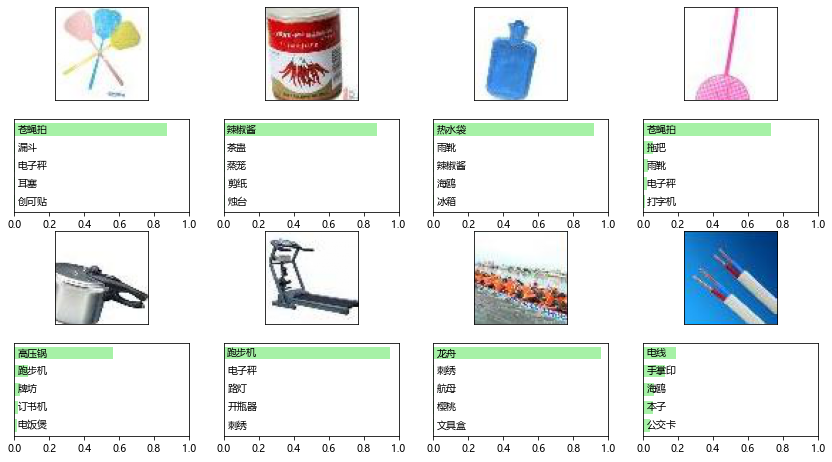

In [79]:
top_k = 5

plt.figure(figsize=(14.4, 12))
label_np = np.array(label_dict)
for i, image in enumerate(gen_imgs(img)):
    prediction = pred_single(image)
    blk = 8 * (i//4) + (i%4) + 1
    
    index_list = np.argpartition(prediction, -top_k)[-top_k:]
    index_list = sorted(index_list, key=lambda x: -prediction[x].numpy())
    
    plt.subplot(6, 4, blk)
    plt.imshow(image[:,:,::-1]/255)
    plt.yticks([])
    plt.xticks([])
    
    plt.subplot(6, 4, blk+4)
    b = plt.barh(range(top_k), prediction.numpy()[index_list][::-1], height=0.7, color='lightgreen', alpha=0.8)
    labels = label_np[index_list][::-1]
    for cnt, rect in enumerate(b):
        plt.text(0.02, rect.get_y()+rect.get_height()/2, labels[cnt], ha='left', va='center')
    plt.yticks([])
    plt.xlim(0,1)